In [1]:
#basic package
import json
import tqdm
import os
import numpy as np
import glob
import pandas as pd
import sys
import shutil
import time
import datetime as dt
import itertools
import time
import re
from collections import Counter
from collections import defaultdict
import operator
import math
import functools
import collections

#plot
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
PACKAGE_PARENT = '../'
SCRIPT_DIR = os.path.dirname(os.path.realpath(os.path.join(os.getcwd(), os.path.expanduser('__file__'))))
sys.path.append(os.path.normpath(os.path.join(SCRIPT_DIR, PACKAGE_PARENT)))
from UTILS import kmeans_clustering, sampen, chi2_distance
import config_origins as config

C:\Users\camil\anaconda3\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


2


In [3]:
path_performance = config.path_performance
path_dataoutput = config.path_dataoutput
dico_pen_tr = config.dico_pen_tr
pal_treat = config.pal_treat
birth_date = config.birth_date
path_extracted_data = config.path_extracted_data
path_performance_visual = os.path.join(path_dataoutput,'performance') 
#create a director if not existing
if not os.path.exists(path_performance_visual):
    os.makedirs(path_performance_visual)

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Download data

In [4]:
#performance
li_df = []
for d in [str(i)+'_4_E420' for i in range(0,4)]:
    print(d)
    for v in ['('+str(i)+')' for i in range(1,21)]:
        xls = pd.ExcelFile(glob.glob(os.path.join(path_performance,d+'.xls*'))[0])
        df = pd.read_excel(xls, v, header=None)
        df = df.iloc[2:,]
        df.columns = df.iloc[0]
        df = df.drop(2, axis=0)
        df = df[~df['Vers.-Tag'].isnull()] #remove all rows taht has nothing to do with the egg per day
        df['LayingPhase'] = d
        df['Pen'] = int(v[1:-1])
        if df.shape[0]!=28:
            print('ERROR: ', d, v,' have wrong shape', df.shape)
        if df.shape[1]!=15:
            print('ERROR: ', d, v,' have wrong shape', df.shape)
        df.head(2)
        li_df.append(df)
        df_test = pd.concat(li_df)
df = pd.concat(li_df)

#egg
df['Nest-eier'].fillna(0,inplace=True)
df['Tier-bestand'].fillna(0,inplace=True)
df['#eggPerTier'] = df.apply(lambda x: x['Nest-eier']/x['Tier-bestand'],axis=1)
#9 septembre 2020: 420 DOA --> ne le ~ 9 juillet 2019
df['#eggOutsideBoxPerTier'] = df.apply(lambda x: x['ver-legt']/x['Tier-bestand'],axis=1)

#death
#first fill na with 0, otherwise the sum will always be =0
df['Ab-gänge'] = df['Ab-gänge'].fillna(0)
df['Kanni-balis.'] = df['Kanni-balis.'].fillna(0)
df['Early_death'] = df['Ab-gänge']+df['Kanni-balis.']

#experiment specifics
df['DOA'] = df['Datum'].map(lambda x: (x-birth_date).days) 
df['WOA'] = df['DOA'].map(lambda x: math.ceil(x/7))
#for now just use our pens (one could add the other)
df = df[df['Pen'].isin([3,4,5,8,9,10,11,12,6,7])]
df['Treatment'] = df['Pen'].map(lambda x: dico_pen_tr['pen'+str(x)])
df = df[df['DOA']<=172]
df.to_csv(os.path.join(path_performance,'egg_summary_adaptability.csv'), index=False, sep=';')

#save for stats in the daptability analysis
df.rename(columns={'Pen':'PenID'}, inplace=True)
df = df[(df['DOA']<=172)&(df['DOA']>=119)]
df['#eggPerTier'] = df['#eggPerTier'].fillna(0)
df['#eggOutsideBoxPerTier'] = df['#eggOutsideBoxPerTier'].fillna(0)
df[['DOA','PenID','Treatment','Early_death','#eggPerTier','WOA','#eggOutsideBoxPerTier']].to_csv(os.path.join(path_performance_visual,'STATPerformance10pensdoa119-172.csv'), index=False, sep=';')

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0_4_E420


C:\Users\camil\anaconda3\lib\site-packages\xlrd\xlsx.py:266: DeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():
C:\Users\camil\anaconda3\lib\site-packages\xlrd\xlsx.py:312: DeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():
C:\Users\camil\anaconda3\lib\site-packages\xlrd\xlsx.py:266: DeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():
C:\Users\camil\anaconda3\lib\site-packages\xlrd\xlsx.py:266: DeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Ele

C:\Users\camil\anaconda3\lib\site-packages\xlrd\xlsx.py:266: DeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():
C:\Users\camil\anaconda3\lib\site-packages\xlrd\xlsx.py:312: DeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():
C:\Users\camil\anaconda3\lib\site-packages\xlrd\xlsx.py:266: DeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():
C:\Users\camil\anaconda3\lib\site-packages\xlrd\xlsx.py:266: DeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Ele

1_4_E420


C:\Users\camil\anaconda3\lib\site-packages\xlrd\xlsx.py:266: DeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():
C:\Users\camil\anaconda3\lib\site-packages\xlrd\xlsx.py:312: DeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():
C:\Users\camil\anaconda3\lib\site-packages\xlrd\xlsx.py:266: DeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():
C:\Users\camil\anaconda3\lib\site-packages\xlrd\xlsx.py:266: DeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Ele

C:\Users\camil\anaconda3\lib\site-packages\xlrd\xlsx.py:266: DeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():
C:\Users\camil\anaconda3\lib\site-packages\xlrd\xlsx.py:312: DeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():
C:\Users\camil\anaconda3\lib\site-packages\xlrd\xlsx.py:266: DeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():
C:\Users\camil\anaconda3\lib\site-packages\xlrd\xlsx.py:266: DeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Ele

2_4_E420


C:\Users\camil\anaconda3\lib\site-packages\xlrd\xlsx.py:266: DeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():
C:\Users\camil\anaconda3\lib\site-packages\xlrd\xlsx.py:312: DeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():
C:\Users\camil\anaconda3\lib\site-packages\xlrd\xlsx.py:266: DeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():
C:\Users\camil\anaconda3\lib\site-packages\xlrd\xlsx.py:266: DeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Ele

C:\Users\camil\anaconda3\lib\site-packages\xlrd\xlsx.py:266: DeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():
C:\Users\camil\anaconda3\lib\site-packages\xlrd\xlsx.py:266: DeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():
C:\Users\camil\anaconda3\lib\site-packages\xlrd\xlsx.py:312: DeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():
C:\Users\camil\anaconda3\lib\site-packages\xlrd\xlsx.py:266: DeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Ele

3_4_E420


C:\Users\camil\anaconda3\lib\site-packages\xlrd\xlsx.py:266: DeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():
C:\Users\camil\anaconda3\lib\site-packages\xlrd\xlsx.py:312: DeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():
C:\Users\camil\anaconda3\lib\site-packages\xlrd\xlsx.py:266: DeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():
C:\Users\camil\anaconda3\lib\site-packages\xlrd\xlsx.py:266: DeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Ele

C:\Users\camil\anaconda3\lib\site-packages\xlrd\xlsx.py:266: DeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():
C:\Users\camil\anaconda3\lib\site-packages\xlrd\xlsx.py:312: DeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():
C:\Users\camil\anaconda3\lib\site-packages\xlrd\xlsx.py:266: DeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():
C:\Users\camil\anaconda3\lib\site-packages\xlrd\xlsx.py:266: DeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Ele

In [5]:
print(df.shape)
df.head(3)

(540, 21)


C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2,Datum,Vers.-Tag,Ab-gänge,Kanni-balis.,spez. Veränderung,Anfangs-Bestand,Tier-bestand,ver-legt,Nest-eier,Total,...,NaN,NaN,LayingPhase,PenID,#eggPerTier,#eggOutsideBoxPerTier,Early_death,DOA,WOA,Treatment
10,2020-09-30 00:00:00,7,0,0,NaN,225,225,NaN,NaN,0,...,NaN,NaN,0_4_E420,3,0.0,0.0,0,119,17,OFH
11,2020-10-01 00:00:00,8,0,0,NaN,225,225,NaN,NaN,0,...,NaN,NaN,0_4_E420,3,0.0,0.0,0,120,18,OFH
12,2020-10-02 00:00:00,9,0,0,NaN,225,225,NaN,NaN,0,...,NaN,NaN,0_4_E420,3,0.0,0.0,0,121,18,OFH


In [10]:
# mvt
df_MVT = pd.read_csv(os.path.join(path_extracted_data, 'daily_ALL_Variable_Tranformed_SNA_clID.csv'), sep=';', 
                     parse_dates=['level'], dayfirst=True) 
print(df_MVT.shape)
df_MVT = df_MVT[~df_MVT['DOA'].isnull()] #TODO: check where this comes from
print(df_MVT.shape)
df_MVT['DIB'] = df_MVT['DOA'].map(lambda x: x-118)
df_MVT['WOA'] = df_MVT['DOA'].map(lambda x: math.ceil(x/7))
#lets restrict to the adaptability study timeframe
df_MVT = df_MVT[df_MVT['level']<=config.max_date_adaptability]
print(df_MVT.shape)
df_MVT.head(3)

(8679, 224)


C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,HenID,level,duration_1_Zone,duration_2_Zone,duration_3_Zone,duration_4_Zone,duration_5_Zone,verification_daily_total_duration,Total_number_zone,Max_duration_zones,...,degree_DTW_30_1_Zone,degree_DTW_30_2_Zone,degree_DTW_30_3_Zone,degree_DTW_30_4_Zone,degree_DTW_30_5_Zone,degree_DTW_30_all,ALL_MLPS_99,ALL_MLPS_10,ALL_MLPS_40,DIB
0,hen_1,2020-09-30,0.0,18886.0,3488.0,515.0,5911.0,28800.0,4.0,2_Zone,...,1.000000,0.131944,0.208333,0.826389,0.437500,0.312500,NaN,NaN,NaN,1.0
1,hen_1,2020-10-01,0.0,9310.0,5636.0,0.0,17454.0,32400.0,3.0,5_Zone,...,0.993197,0.047619,0.176871,0.802721,0.115646,0.380952,NaN,NaN,NaN,2.0
2,hen_1,2020-10-02,0.0,0.0,551.0,0.0,31849.0,32400.0,2.0,5_Zone,...,1.000000,0.564626,0.646259,0.802721,0.455782,0.503401,NaN,NaN,NaN,3.0


## in numbers

In [6]:
print(max(df['DOA'].tolist()))
df['Treatment_allpens'] = df['Treatment'].map(lambda x: x.split('-')[0])
#sum all the death within this two months time period
df_ = df.groupby(['Treatment_allpens', 'PenID'])['Early_death'].sum().reset_index()
display(df_)
#shows stat on the sumed early death across the 2 treatments
df_.groupby(['Treatment_allpens'])['Early_death'].describe()

172


C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Treatment_allpens,PenID,Early_death
0,OFH,3,6
1,OFH,5,5
2,OFH,7,4
3,OFH,9,5
4,OFH,11,5
5,TRAN,4,5
6,TRAN,6,13
7,TRAN,8,9
8,TRAN,10,7
9,TRAN,12,6


,count,mean,std,min,25%,50%,75%,max
Treatment_allpens,,,,,,,,
OFH,5.0,5.0,0.707107,4.0,5.0,5.0,5.0,6.0
TRAN,5.0,8.0,3.162278,5.0,6.0,7.0,9.0,13.0


## in visuals

In [7]:
#small date verification
df[df['PenID']==3][['Datum']].head(50)

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2,Datum
10,2020-09-30 00:00:00
11,2020-10-01 00:00:00
12,2020-10-02 00:00:00
13,2020-10-03 00:00:00
14,2020-10-04 00:00:00
15,2020-10-05 00:00:00
16,2020-10-06 00:00:00
17,2020-10-07 00:00:00
18,2020-10-08 00:00:00
19,2020-10-09 00:00:00


## Eggs

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


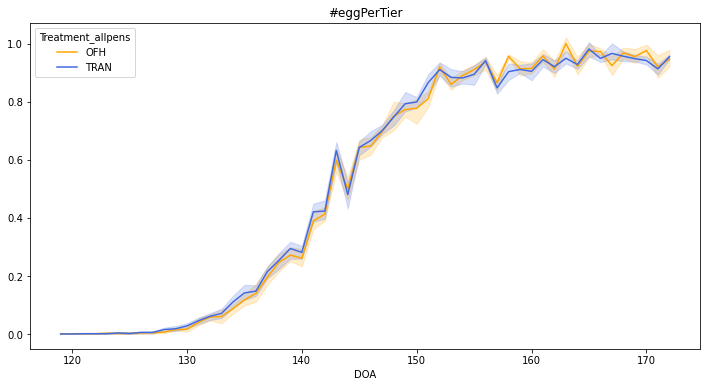

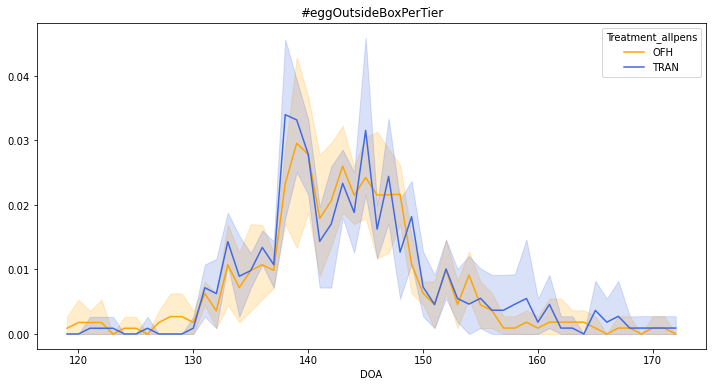

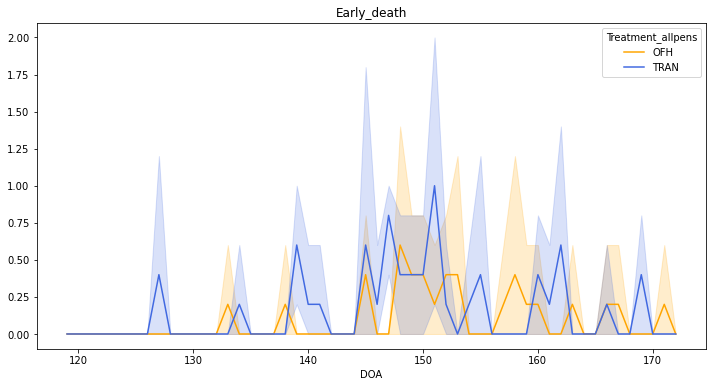

In [8]:
for v in ['#eggPerTier', '#eggOutsideBoxPerTier', 'Early_death']:
    #DOA
    #0_4_E219: not using it: high picks at the beginigna s they dont take everyday, but every few days and hence the sum is higher!
    #avg egg weight/pen
    plt.figure(figsize=(12,6))
    ax = plt.plot()
    df[v] = df[v].astype(float)
    sns.lineplot(x="DOA", y=v, hue='Treatment_allpens', data=df, palette=pal_treat)
    plt.ylabel('')
    plt.title(v)
    plt.savefig(os.path.join(path_performance_visual,v+'_DOA.png'),dpi=300,format='png',bbox_inches='tight')
    plt.show();

In [12]:
df_MVT.head(3)

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,HenID,level,duration_1_Zone,duration_2_Zone,duration_3_Zone,duration_4_Zone,duration_5_Zone,verification_daily_total_duration,Total_number_zone,Max_duration_zones,...,degree_DTW_30_1_Zone,degree_DTW_30_2_Zone,degree_DTW_30_3_Zone,degree_DTW_30_4_Zone,degree_DTW_30_5_Zone,degree_DTW_30_all,ALL_MLPS_99,ALL_MLPS_10,ALL_MLPS_40,DIB
0,hen_1,2020-09-30,0.0,18886.0,3488.0,515.0,5911.0,28800.0,4.0,2_Zone,...,1.000000,0.131944,0.208333,0.826389,0.437500,0.312500,NaN,NaN,NaN,1.0
1,hen_1,2020-10-01,0.0,9310.0,5636.0,0.0,17454.0,32400.0,3.0,5_Zone,...,0.993197,0.047619,0.176871,0.802721,0.115646,0.380952,NaN,NaN,NaN,2.0
2,hen_1,2020-10-02,0.0,0.0,551.0,0.0,31849.0,32400.0,2.0,5_Zone,...,1.000000,0.564626,0.646259,0.802721,0.455782,0.503401,NaN,NaN,NaN,3.0


In [17]:
df_nnmvt = df_MVT.groupby(['PenID','level'])['Total_number_transition'].agg(lambda x: list(x)).reset_index()
df_nnmvt['nbr_obs'] = df_nnmvt['Total_number_transition'].map(lambda x: len(x))
df_nnmvt['perc_nnmovt'] = df_nnmvt['Total_number_transition'].map(lambda x: sum([i==0 for i in x])/len(x)*100)
df_nnmvt.head(3)

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,PenID,level,Total_number_transition,nbr_obs,perc_nnmovt
0,3.0,2020-09-30,"[7.0, 23.0, 12.0, 6.0, 9.0, 15.0, 18.0, 2.0, 0...",17,11.764706
1,3.0,2020-10-01,"[0.0, 29.0, 5.0, 7.0, 0.0, 36.0, 8.0, 0.0, 3.0...",18,44.444444
2,3.0,2020-10-02,"[0.0, 22.0, 0.0, 2.0, 2.0, 12.0, 49.0, 9.0, 1....",19,26.315789


In [20]:
df.head(3)

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2,Datum,Vers.-Tag,Ab-gänge,Kanni-balis.,spez. Veränderung,Anfangs-Bestand,Tier-bestand,ver-legt,Nest-eier,Total,...,LayingPhase,PenID,#eggPerTier,#eggOutsideBoxPerTier,Early_death,DOA,WOA,Treatment,Treatment_allpens,level
10,2020-09-30 00:00:00,7,0,0,NaN,225,225,NaN,NaN,0,...,0_4_E420,3,0.0,0.0,0.0,119,17,OFH,OFH,2020-09-30
11,2020-10-01 00:00:00,8,0,0,NaN,225,225,NaN,NaN,0,...,0_4_E420,3,0.0,0.0,0.0,120,18,OFH,OFH,2020-10-01
12,2020-10-02 00:00:00,9,0,0,NaN,225,225,NaN,NaN,0,...,0_4_E420,3,0.0,0.0,0.0,121,18,OFH,OFH,2020-10-02


In [38]:
df['level'] = df['Datum'].map(lambda x:  dt.datetime(x.year,x.month,x.day))
df_nnmvt['level'] = df_nnmvt['level'].map(lambda x:  dt.datetime(x.year,x.month,x.day))

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [62]:
df_nnmvtegg = pd.merge(df, df_nnmvt, on=['PenID','level'], how='right')
print(df_nnmvt.shape, df.shape, df_nnmvtegg.shape)
df_nnmvtegg['DIB'] = df_nnmvtegg['DOA'].map(lambda x: x-118)
#save for stats
df_nnmvtegg[df_nnmvtegg['level']<=dt.datetime(2020,10,29)].to_csv(os.path.join(path_performance,'mvt_egg.csv'), index=False, sep=';')
df_nnmvtegg.head(3)

(411, 5) (540, 23) (411, 26)


C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Datum,Vers.-Tag,Ab-gänge,Kanni-balis.,spez. Veränderung,Anfangs-Bestand,Tier-bestand,ver-legt,Nest-eier,Total,...,Early_death,DOA,WOA,Treatment,Treatment_allpens,level,Total_number_transition,nbr_obs,perc_nnmovt,DIB
0,2020-09-30 00:00:00,7,0,0,NaN,225,225,NaN,NaN,0,...,0.0,119,17,OFH,OFH,2020-09-30,"[7.0, 23.0, 12.0, 6.0, 9.0, 15.0, 18.0, 2.0, 0...",17,11.764706,1
1,2020-10-01 00:00:00,8,0,0,NaN,225,225,NaN,NaN,0,...,0.0,120,18,OFH,OFH,2020-10-01,"[0.0, 29.0, 5.0, 7.0, 0.0, 36.0, 8.0, 0.0, 3.0...",18,44.444444,2
2,2020-10-02 00:00:00,9,0,0,NaN,225,225,NaN,NaN,0,...,0.0,121,18,OFH,OFH,2020-10-02,"[0.0, 22.0, 0.0, 2.0, 2.0, 12.0, 49.0, 9.0, 1....",19,26.315789,3


C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\camil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


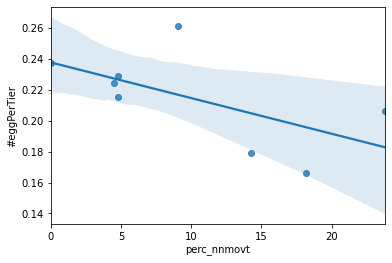

In [49]:
sns.regplot('perc_nnmovt','#eggPerTier', df_nnmvtegg[df_nnmvtegg['level']==dt.datetime(2020,10,18)]);

## Death

In [9]:
#look more precisely when they occured
df[df['Early_death']>0][['Datum','PenID','Treatment','Early_death','DOA']].sort_values(['DOA'])

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2,Datum,PenID,Treatment,Early_death,DOA
18,2020-10-08 00:00:00,10,TRAN,2.0,127
24,2020-10-14 00:00:00,3,OFH,1.0,133
25,2020-10-15 00:00:00,12,TRAN,1.0,134
29,2020-10-19 00:00:00,3,OFH,1.0,138
30,2020-10-20 00:00:00,8,TRAN,1.0,139
30,2020-10-20 00:00:00,10,TRAN,1.0,139
30,2020-10-20 00:00:00,12,TRAN,1.0,139
31,2020-10-21 00:00:00,8,TRAN,1.0,140
4,2020-10-22 00:00:00,4,TRAN,1.0,141
8,2020-10-26 00:00:00,11,OFH,1.0,145


(216, 3)


C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,DOA,Treatment,Early_death
0,119,OFH,0.0
1,119,OFH-nonfocal,0.0
2,119,TRAN,0.0


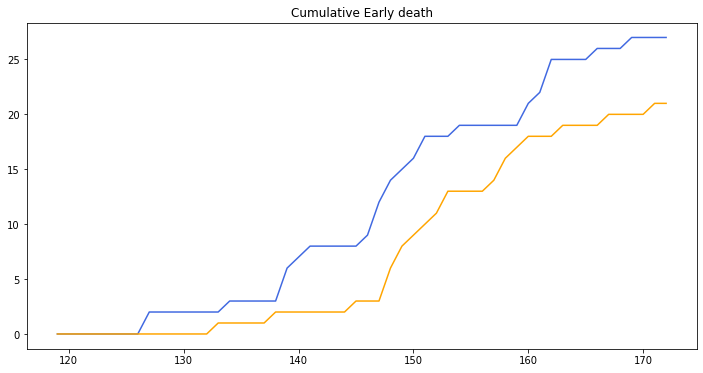

(216, 3)


,DOA,Treatment,#eggOutsideBoxPerTier
0,119,OFH,0.004444
1,119,OFH-nonfocal,0.000000
2,119,TRAN,0.000000


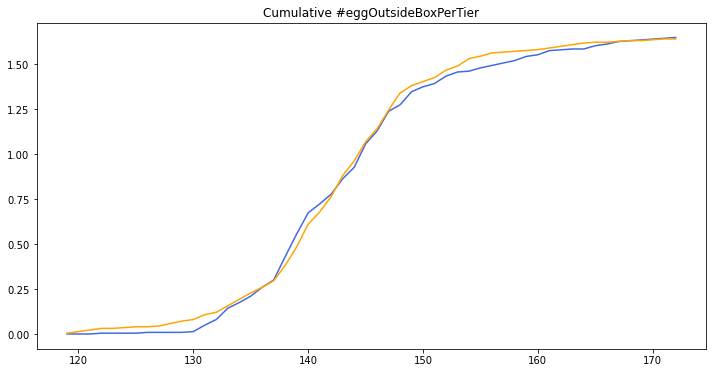

In [10]:
for v in ['Early_death','#eggOutsideBoxPerTier']:
    
    df_= df.groupby(['DOA','Treatment'])[v].sum().reset_index()
    print(df_.shape)
    display(df_.head(3))

    #plot
    plt.figure(figsize=(12,6))
    ax = plt.plot()
    df[v] = df[v].astype(float)
    #Cumulative Variance explains
    #TRAN
    x_TRAN = df_[df_['Treatment']=='TRAN']['DOA'].tolist()
    li_TRAN = np.cumsum(df_[df_['Treatment']=='TRAN'][v].tolist())
    plt.plot(x_TRAN, li_TRAN, color='royalblue')
    #OFH
    x_OFH = df_[df_['Treatment']=='OFH']['DOA'].tolist()
    li_OFH = np.cumsum(df_[df_['Treatment']=='OFH'][v].tolist())
    plt.plot(x_OFH, li_OFH, color='orange')
    plt.title('Cumulative '+v.replace('_',' '))
    plt.savefig(os.path.join(path_performance_visual, 'Cumulative_'+v+'_DOA.png'),dpi=300,format='png',bbox_inches='tight')
    plt.show();

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


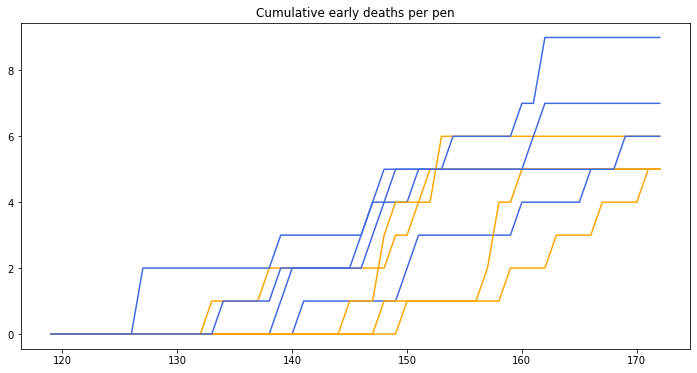

In [12]:
#per pen
plt.figure(figsize=(12,6))
ax = plt.plot()
for p in df['PenID'].unique():
    df_= df[df['PenID']==p].groupby(['DOA','Treatment'])['Early_death'].sum().reset_index()

    #plot the cumulative early death
    #TRAN
    x_TRAN = df_[df_['Treatment']=='TRAN']['DOA'].tolist()
    li_TRAN = np.cumsum(df_[df_['Treatment']=='TRAN']['Early_death'].tolist())
    plt.plot(x_TRAN, li_TRAN, color='royalblue')
    #OFH
    x_OFH = df_[df_['Treatment']=='OFH']['DOA'].tolist()
    li_OFH = np.cumsum(df_[df_['Treatment']=='OFH']['Early_death'].tolist())
    plt.plot(x_OFH, li_OFH, color='orange')
    plt.title('Cumulative early deaths per pen')
    plt.savefig(os.path.join(path_performance_visual, 'Pens_cum_Early_death_DOA.png'),dpi=300,format='png',bbox_inches='tight')
plt.show();